In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# data visualization
%matplotlib inline
import seaborn as sns

In [3]:
# Preprocessing modules
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import OneHotEncoder

In [4]:
# Model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [52]:
# Metrics
from sklearn.metrics import plot_confusion_matrix, classification_report, plot_roc_curve
from sklearn.metrics import accuracy_score


In [6]:
# Saving the model
import pickle


In [7]:
# to ignore warning
import warnings
warnings.filterwarnings("ignore")#, category=DeprecationWarning)

In [8]:
data = pd.read_csv('/content/drive/MyDrive/Risk and fraud /PS_20174392719_1491204439457_log.csv')
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [9]:
df=data.copy()
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [10]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [12]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [13]:
df['isFraud'].unique()

array([0, 1])

In [14]:
df.shape

(6362620, 11)

In [15]:
# checking whether the data is balanced or not.
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

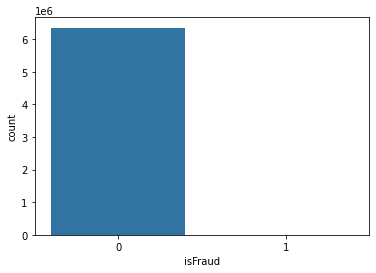

In [16]:
# Visualizing the distribution of the Target variable
sns.countplot(df['isFraud'])
plt.show()

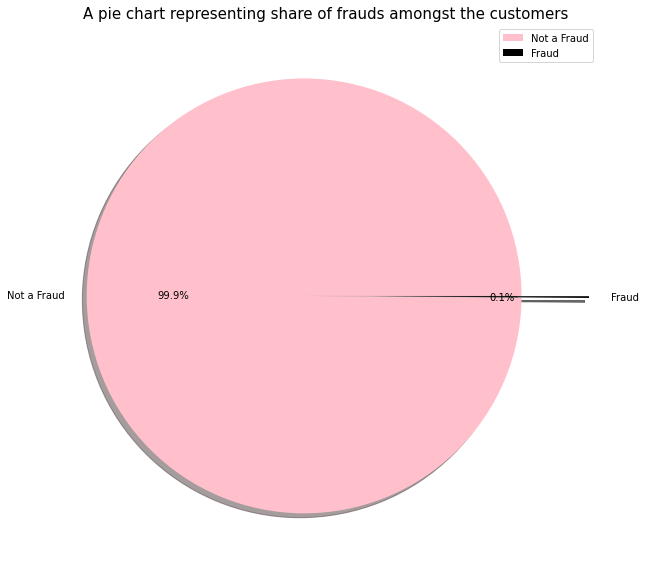

In [17]:
labels = ['Not a Fraud', 'Fraud']
colors = ['pink', 'black']
x = [6354407, 8213]
explode = [0.1, 0.21]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(x, labels = labels, colors = colors, explode = explode, shadow = True, autopct='%1.1f%%')
plt.axis('off')
plt.title('A pie chart representing share of frauds amongst the customers',fontsize = 15)
plt.legend()
plt.show()


In [18]:
data['isFlaggedFraud'].value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

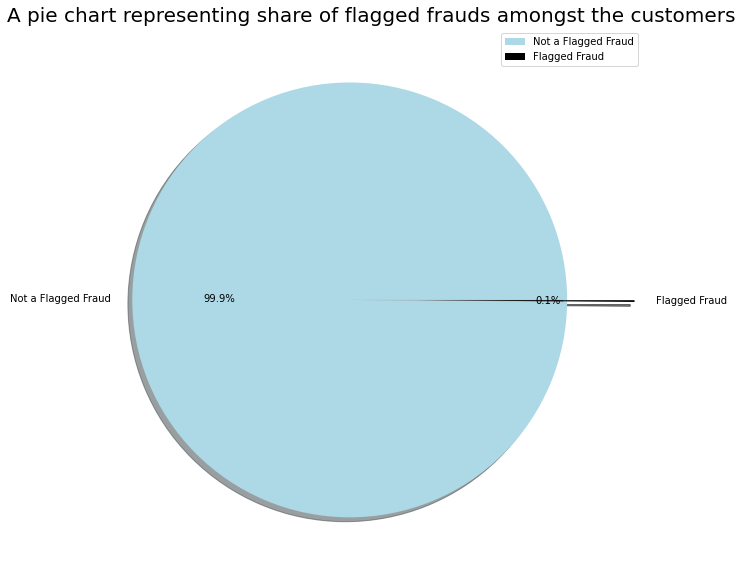

In [19]:
labels = ['Not a Flagged Fraud', 'Flagged Fraud']
colors = ['lightblue', 'black']
size = [6354407, 8213]
explode = [0.1, 0.21]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True, autopct='%1.1f%%')
plt.axis('off')
plt.title('A pie chart representing share of flagged frauds amongst the customers',fontsize = 20)
plt.legend()
plt.show()

there almost 99% - 1% distribution is there in target values.so this data is highly unbalanced

In [20]:
data['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

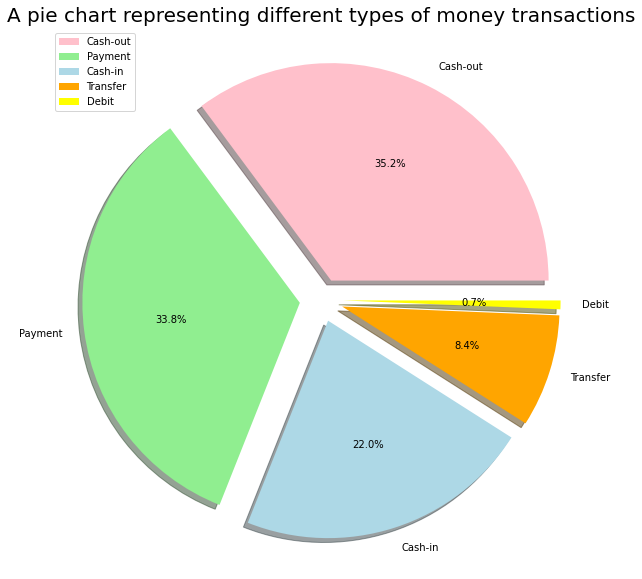

In [21]:
labels = ['Cash-out', 'Payment', 'Cash-in', 'Transfer', 'Debit']
size = [2237500, 2151495, 1399284, 532909, 41432]
colors = ['pink', 'lightgreen', 'lightblue', 'orange', 'yellow']
explode = [0.1, 0.1, 0.1, 0.1, 0.1]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True,autopct='%1.1f%%')
plt.title('A pie chart representing different types of money transactions', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

# checking the correlation

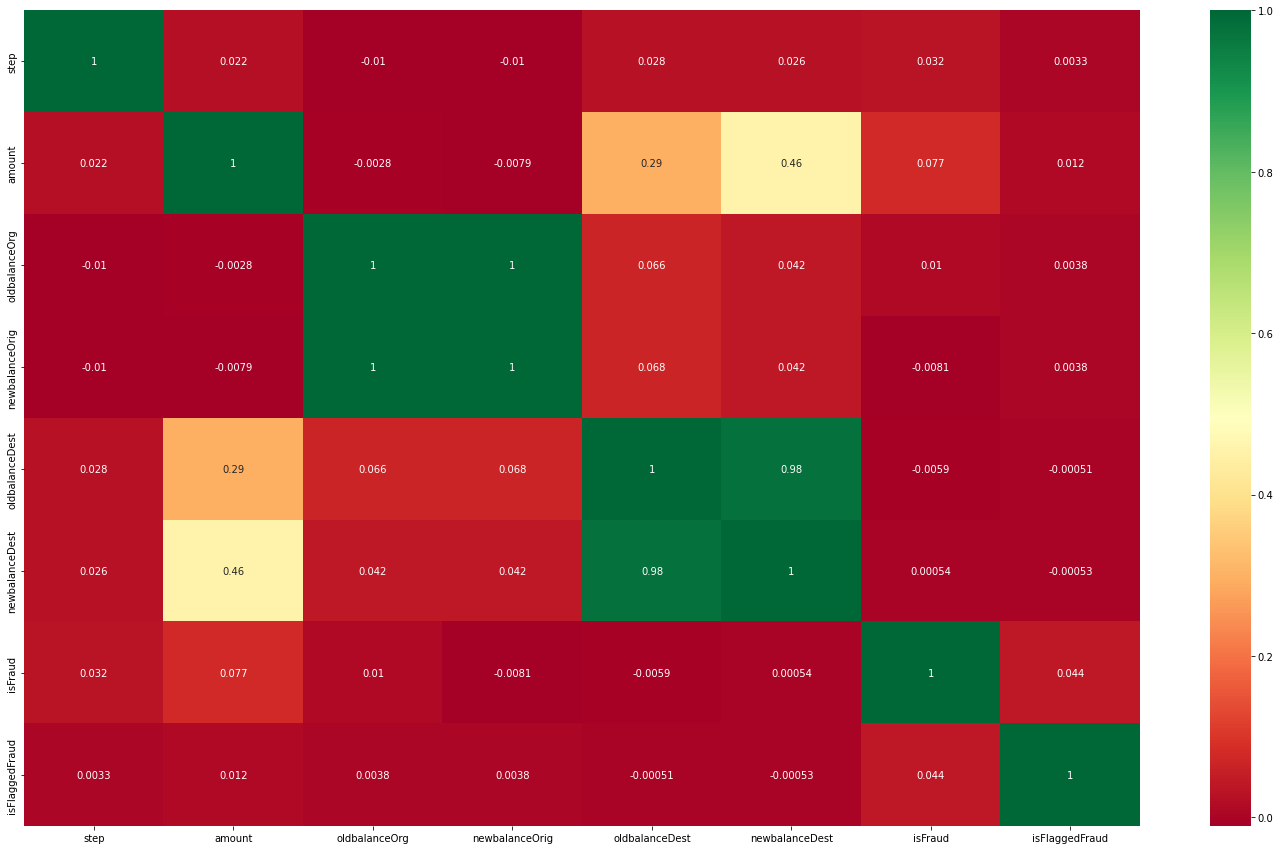

In [22]:
corr = df.corr()
plt.figure(figsize=(25, 15))
sns.heatmap(corr, annot=True, cmap='RdYlGn')
plt.show()

Here we can observe that there are some independent variables correlated with each other.
Input features oldbalanceDest and newbalanceDest are correlated with each other so we had to drop one of the feature. To decide which one to drop amongst them we have to check their correlation with dependent feature (isFraud), oldbalanceDest is highly negatively correlated (-0.0059) with target feature than newbalanceDest (0.00054). here we have to drop the newbalanceDest feature.

likewise above oldbalanceOrig and newbalanceOrig are also correlated with each other and newbalanceOrig is highly negatively correlated (-0.0081) with target feature than oldbalanceOrg (0.01). here we have to drop the oldbalanceOrg feature.

In [23]:
df['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

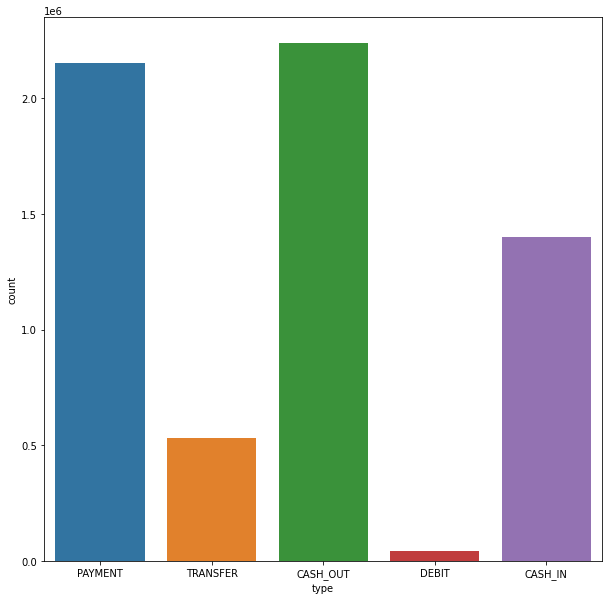

In [24]:
sns.countplot(df['type'])
plt.rcParams['figure.figsize'] = (6, 4)
plt.show()

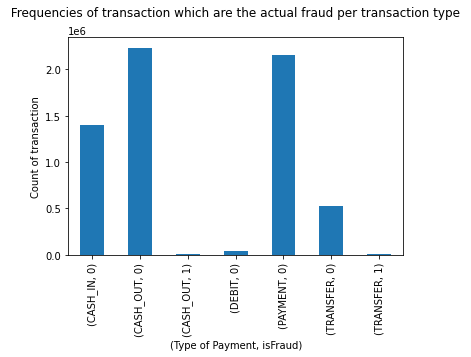

In [25]:
fraud_type = df.groupby(['type', 'isFraud']).size().plot(kind='bar',)
fraud_type.set_title(" Frequencies of transaction which are the actual fraud per transaction type \n" )
fraud_type.set_xlabel("(Type of Payment, isFraud)")
fraud_type.set_ylabel("Count of transaction")
plt.rcParams['figure.figsize'] = (5, 3)
plt.show()

split the fraud transaction by transaction type

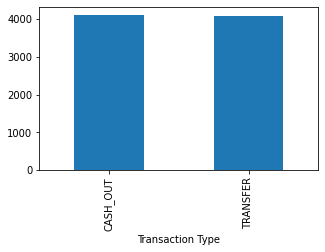

In [26]:
fraud = df['isFraud'].isin([1])
plt.rcParams['figure.figsize'] = (5, 3)
fraud_time = df[fraud].groupby(['type']).size().plot(kind='bar')
fraud_time.set_xlabel("Transaction Type")
plt.show()

The fraudulent transactions are splitted in an equal percentage.

Only CASH-OUT and TRANSFER transactions can be fraudulent.

Checking the account balance is matching before transaction and after the transaction for both originator and recipient

In [27]:
print("Are there any mismatch in the balance at origin and destination after transaction?")

df['origBalance_inacc'] = (df["oldbalanceOrg"] - df["amount"] != df["newbalanceOrig"]).astype(int)
df['destBalance_inacc'] = (df["oldbalanceDest"] + df["amount"] != df["newbalanceDest"]).astype(int)

print("Balance Error(%) at the origin:",round(df['origBalance_inacc'].value_counts()[1]/df.shape[0] * 100,2))

print("Balance Error(%) at the destination:",round(df['destBalance_inacc'].value_counts()[1]/df.shape[0] * 100,2))

Are there any mismatch in the balance at origin and destination after transaction?
Balance Error(%) at the origin: 85.09
Balance Error(%) at the destination: 74.45


Checking Whether there is there any Transaction Amounts that are Negative or Zero

In [28]:
print("Number of transactions with amount is less 0?")
print(len(df[df.amount<0]))

print("Number of transactions with amount is equal to 0?")
print(len(df[df.amount==0]))

Number of transactions with amount is less 0?
0
Number of transactions with amount is equal to 0?
16


So there is 16 transacations when the amount is  zero

checking about these 16 transactions are of which type of payment methods they used and are they fraudulent trasacntions or not?

In [29]:
print("What type of transactions are they?")
print(df[df.amount<=0]['type'].value_counts())

print("Are all these marked as Fraud Transactions?")
df[df.amount<=0]['isFraud'].value_counts()[1] == len(df[df.amount<=0])

What type of transactions are they?
CASH_OUT    16
Name: type, dtype: int64
Are all these marked as Fraud Transactions?


True

Checking whether the Falgged transactions are Fraudulent ones or not 

In [30]:
df_temp = df[df.isFlaggedFraud==1]
print("How many frauds transactions are Flagged?:")
print("\t",len(df_temp))

print("What type of transactions are they?")
print("\t",df_temp['type'].value_counts().index[0])

print("Are all these flagged also marked as Fraud Transactions?")
print("\t",df_temp['isFraud'].value_counts()[1] == len(df_temp))

How many frauds transactions are Flagged?:
	 16
What type of transactions are they?
	 TRANSFER
Are all these flagged also marked as Fraud Transactions?
	 True


Therefore, there is an almost equal likelihood that a fraudulent transaction can be CASH_OUT or TRANSFER

All the fraud trnasactions belong to Transfer or Cash-out type, So, we combinig all the type of payments(PAYMENT, CASH-IN and DEBIT) other than CASH-OUT and TRANSFER as OTHERS.

In [31]:
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [32]:
type_map = {
    'PAYMENT':'OTHERS',
    'TRANSFER':'TRANSFER',
    'CASH_OUT':'CASH_OUT',
    'DEBIT':'OTHERS',
    'CASH_IN':'OTHERS'
}

In [33]:
df['type'] = df['type'].map(type_map)

df['type'].unique()

array(['OTHERS', 'TRANSFER', 'CASH_OUT'], dtype=object)

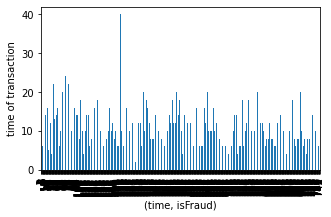

In [34]:
fraud = df['isFraud'].isin([1])

fraud_time = df[fraud].groupby(['step']).size().plot(kind='bar')
fraud_time.set_xlabel("(time, isFraud)")
fraud_time.set_ylabel("time of transaction")
plt.show()

The fraud transactions are almost uniformly spread out across time steps, so this variable is not giving us any information which might impact the target variable. so its better to drop this variable.

#MACHINE LEARNING MODELS

# deleting the unnecessary varibles from input data

In [35]:
X = df.drop(columns=['step', 'newbalanceDest','oldbalanceOrg','nameOrig','nameDest','isFlaggedFraud','isFraud'])
X.head()

,type,amount,newbalanceOrig,oldbalanceDest,origBalance_inacc,destBalance_inacc
0,OTHERS,9839.64,160296.36,0.0,0,1
1,OTHERS,1864.28,19384.72,0.0,0,1
2,TRANSFER,181.00,0.00,0.0,0,1
3,CASH_OUT,181.00,0.00,21182.0,0,1
4,OTHERS,11668.14,29885.86,0.0,0,1


In [36]:
y = df['isFraud']
y.head()

0    0
1    0
2    1
3    1
4    0
Name: isFraud, dtype: int64

In [37]:
y.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
dummies_type = pd.get_dummies(X_train['type'], prefix='type', drop_first=True)

In [40]:
X_train = pd.concat([X_train, dummies_type], axis=1)

In [41]:
X_train.head()

,type,amount,newbalanceOrig,oldbalanceDest,origBalance_inacc,destBalance_inacc,type_OTHERS,type_TRANSFER
6271196,OTHERS,386385.08,5055953.92,506035.06,1,1,1,0
1888243,OTHERS,212458.78,447093.78,806037.88,1,1,1,0
5549957,OTHERS,19967.60,0.00,0.00,1,1,1,0
2025342,CASH_OUT,527616.51,0.00,92157.10,1,0,0,0
682342,TRANSFER,206067.85,0.00,2131494.48,1,1,0,1


In [42]:
X_train = X_train.drop(columns=['type'])

Preprocessing the Test Data 

In [43]:
dummies_type = pd.get_dummies(X_test['type'], prefix='type', drop_first=True)

In [44]:
X_test = pd.concat([X_test, dummies_type], axis=1)

In [45]:
X_test.head()

,type,amount,newbalanceOrig,oldbalanceDest,origBalance_inacc,destBalance_inacc,type_OTHERS,type_TRANSFER
3737323,OTHERS,330218.42,351084.42,452419.57,1,1,1,0
264914,OTHERS,11647.08,18722.92,0.00,0,1,1,0
85647,OTHERS,152264.21,258853.21,201303.01,1,1,1,0
5899326,TRANSFER,1551760.63,0.00,3198359.45,1,0,0,1
2544263,OTHERS,78172.30,2999503.88,415821.90,1,1,1,0


In [46]:
X_test = X_test.drop(columns=['type'])

In [47]:
(X_train.columns == X_test.columns).all()

True

# MODEL-1 Logistic Regression

In [48]:
lr = LogisticRegression(class_weight="balanced")

lr_model = lr.fit(X_train, y_train)

print(lr.score(X_test, y_test))

0.4433794568904005


In [49]:
y_pred = lr_model.predict(X_test)

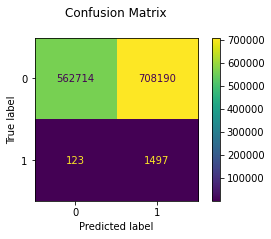

In [50]:
plot_confusion_matrix(lr_model, X_test, y_test)
plt.title('Confusion Matrix\n')
plt.show()

In [55]:
print("Classification Report:\n\n", classification_report(y_test, y_pred))
acc1=accuracy_score(y_test,y_pred)
print("logistic regression accuracy :",acc1)

Classification Report:

               precision    recall  f1-score   support

           0       1.00      0.44      0.61   1270904
           1       0.00      0.92      0.00      1620

    accuracy                           0.44   1272524
   macro avg       0.50      0.68      0.31   1272524
weighted avg       1.00      0.44      0.61   1272524

logistic regression accuracy : 0.4433794568904005


#Naive bayes

In [63]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [59]:
y_pred = gnb.predict(X_test)

In [61]:
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)
print("Classification Report:\n\n", classification_report(y_test, y_pred))

Gaussian Naive Bayes model accuracy(in %): 99.39419610160594
Classification Report:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.04      0.16      0.06      1620

    accuracy                           0.99   1272524
   macro avg       0.52      0.58      0.53   1272524
weighted avg       1.00      0.99      1.00   1272524



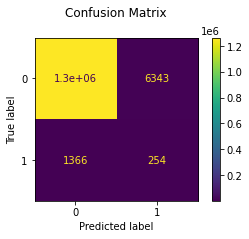

In [65]:
plot_confusion_matrix(gnb, X_test, y_test)
plt.title('Confusion Matrix\n')
plt.show()

#KNN

In [64]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("K nearest neighbor model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)
print("Classification Report:\n\n", classification_report(y_test, y_pred))

K nearest neighbor model accuracy(in %): 99.87190811332438
Classification Report:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.46      0.04      0.07      1620

    accuracy                           1.00   1272524
   macro avg       0.73      0.52      0.54   1272524
weighted avg       1.00      1.00      1.00   1272524



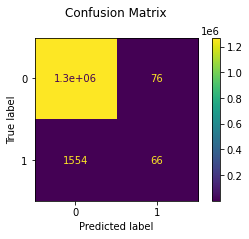

In [66]:
plot_confusion_matrix(knn, X_test, y_test)
plt.title('Confusion Matrix\n')
plt.show()

# Random Forest

In [67]:
rf = RandomForestClassifier(class_weight="balanced")
rf_model = rf.fit(X_train, y_train)
rf_model.score(X_test, y_test)

0.9999960708010223

Fine tuning

In [68]:
rf_params = {
    'n_estimators' : [50,100,130,150],
    'max_depth' : [4,5,1,2,None],
    'min_samples_split' : [2,3,4,5],
    'min_samples_leaf' : [1,4,10,20],
    'max_leaf_nodes' : [2,5,10,None]
    
}

In [69]:
rf_rs = RandomizedSearchCV(rf, rf_params, cv=5, n_iter=5)
rf_best_model = rf_rs.fit(X_train, y_train)
rf_best_model.score(X_test, y_test)


KeyboardInterrupt: ignored

In [ ]:
rf_best_model.best_params


In [ ]:
rf_best_model.best_estimator

In [ ]:
y_pred = rf_best_model.predict(X_test)

In [ ]:
plot_confusion_matrix(rf_best_model, X_test, y_test)
plt.title('Confusion Matrix\n')
plt.show()

In [ ]:
print("random forest model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)
print("Classification Report:\n\n", classification_report(y_test, y_pred))